<a href="https://colab.research.google.com/github/laurasofia-lgtm/DATOS-COLOMBIA/blob/main/datos_colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONCATENAR

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df_2006_2018 = pd.read_excel("/content/drive/MyDrive/CIENCIA DE DATOS/2do CORTE/COLOMBIA/DATOS/datos_2006_2018.xlsx")
df_2019_2024 = pd.read_excel("/content/drive/MyDrive/CIENCIA DE DATOS/2do CORTE/COLOMBIA/DATOS/datos_2019_2024.xlsx")

In [3]:
df_combined = pd.concat([df_2006_2018, df_2019_2024], ignore_index=True)
df_combined.head()

,Código Dane departamento,Departamento,Código Dane municipio,Municipio,Grupo cultivo,Subgrupo,Cultivo,Desagregación cultivo,Año,Periodo,Área sembrada (ha),Área cosechada (ha),Producción (t),Rendimiento (t/ha),Estado físico del cultivo,Nombre científico del cultivo,Ciclo del cultivo
0,15,BOYACÁ,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2.0,1.0,1.0,1.000000,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82.0,80.0,1440.0,18.000000,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1.5,1.5,26.0,17.333333,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3.0,3.0,48.0,16.000000,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,0.5,0.5,5.0,10.000000,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


In [4]:
output_path = "/content/drive/MyDrive/CIENCIA DE DATOS/2do CORTE/COLOMBIA/DATOS/datos_2006_2024.xlsx"
df_combined.to_excel(output_path, index=False)

# HOMOGENIZACION


In [20]:
for col in df_combined.columns:
    if df_combined[col].dtype == 'object':
        try:
            df_combined[col] = df_combined[col].str.upper()
        except AttributeError:
            # Handle cases where the column might contain non-string values
            pass

output_path_combined = "/content/drive/MyDrive/CIENCIA DE DATOS/2do CORTE/COLOMBIA/DATOS/datos_2006_2024.xlsx"
df_combined.to_excel(output_path_combined, index=False)

print(f"El archivo '{output_path_combined}' ha sido guardado con éxito con todas las palabras en mayúsculas.")

El archivo '/content/drive/MyDrive/CIENCIA DE DATOS/2do CORTE/COLOMBIA/DATOS/datos_2006_2024.xlsx' ha sido guardado con éxito con todas las palabras en mayúsculas.


# ANALISIS EXPLORATORIO


## Cantidad de filas y columnas




In [12]:
num_rows, num_cols = df_combined.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_cols}")

Número de filas: 351920
Número de columnas: 17


## Cantidad de datos faltantes por columna



In [13]:
missing_values = df_combined.isnull().sum()
print("Cantidad de datos faltantes por columna:")
print(missing_values)

Cantidad de datos faltantes por columna:
Código Dane departamento             0
Departamento                         0
Código Dane municipio                0
Municipio                            0
Grupo cultivo                        0
Subgrupo                             0
Cultivo                              0
Desagregación cultivo                0
Año                                  0
Periodo                          97231
Área sembrada (ha)                   0
Área cosechada (ha)                  0
Producción (t)                       0
Rendimiento (t/ha)                3558
Estado físico del cultivo            0
Nombre científico del cultivo     2983
Ciclo del cultivo                    0
dtype: int64


## Cantidad de cultivos



In [14]:
unique_cultivos = df_combined['Cultivo'].nunique()
print(f"Cantidad de cultivos únicos: {unique_cultivos}")

Cantidad de cultivos únicos: 270


## Top 10 cultivos con mayor área sembrada


Total de área sembrada (ha) para los 10 cultivos principales:
Cultivo
CAFÉ               1.601441e+07
ARROZ              1.091993e+07
MAÍZ               1.087907e+07
PALMA DE ACEITE    1.003931e+07
PLATANO            5.252054e+06
YUCA               3.925708e+06
CACAO              3.737506e+06
PAPA               3.335074e+06
CAÑA               3.130051e+06
PLÁTANO            2.838407e+06
Name: Área sembrada (ha), dtype: float64


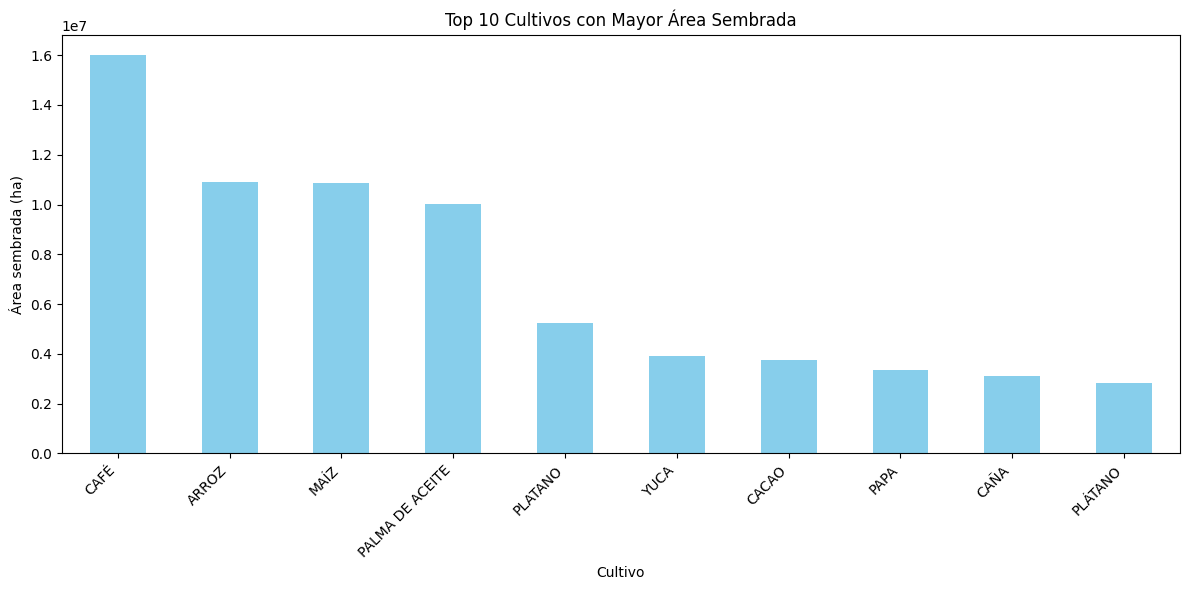

In [17]:
import matplotlib.pyplot as plt

# Unificar 'MAIZ' y 'MAÍZ'
df_combined['Cultivo'] = df_combined['Cultivo'].replace('MAIZ', 'MAÍZ')

cultivo_area = df_combined.groupby('Cultivo')['Área sembrada (ha)'].sum().sort_values(ascending=False)
top_10_cultivos = cultivo_area.head(10)

print("Total de área sembrada (ha) para los 10 cultivos principales:")
print(top_10_cultivos)

plt.figure(figsize=(12, 6))
top_10_cultivos.plot(kind='bar', color='skyblue')
plt.xlabel('Cultivo')
plt.ylabel('Área sembrada (ha)')
plt.title('Top 10 Cultivos con Mayor Área Sembrada')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()